<div style="background-color:white; color:black; padding:10px; width:100%;">
  <table style="width:100%; border:none;">
    <tr style="border:none;">
      <td style="text-align:left; border:none; vertical-align:middle;">
        <a href="https://dswa.vercel.app/" target="_blank">
          <img src="images/logo.svg" alt="Logo" style="height:120px;">
        </a>
      </td>
      <td style="text-align:right; border:none; vertical-align:middle;">
        <h2 style="margin:0; font-size:80px;">
          <strong href="https://dswa.vercel.app/" target="_blank" style="text-decoration:none; color:black; padding-right:40px;">
            DSWA
          </strong>
        </h2>
      </td>
    </tr>
  </table>
</div>

# Segmentação de Clientes com K-Means

**Tópico:** Aprendizado Não Supervisionado - Análise de Cluster

**Dataset:** [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)

### **Objetivo da Competição**

Bem-vindo(a)!

Neste notebook, vamos explorar o mundo do **Aprendizado Não Supervisionado**. Diferente do aprendizado supervisionado (onde temos um "gabarito" ou uma variável alvo, como "vendeu" ou "não vendeu"), aqui o objetivo é encontrar padrões e estruturas escondidas nos dados por conta própria.

Usaremos uma das técnicas mais famosas para isso: o **K-Means Clustering**. Nossa missão será agrupar clientes de um shopping com base em seus perfis de compra, criando "segmentos" ou "personas".

**A sua tarefa** será analisar esses segmentos e extrair insights de negócio a partir deles. Vamos começar!

### **Passo 1: Preparação do Ambiente**

Primeiro, vamos importar as bibliotecas que nos ajudarão nesta jornada.

-   **pandas:** para carregar e manipular nossos dados.
-   **numpy:** para operações numéricas.
-   **matplotlib & seaborn:** para criar visualizações incríveis.
-   **scikit-learn:** para usar o algoritmo K-Means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### **Passo 2: Carregando e Explorando os Dados (EDA - Exploratory Data Analysis)**

Vamos usar o dataset "Mall Customer Segmentation" do Kaggle. Ele contém informações básicas sobre os clientes de um shopping.

**Colunas do Dataset:**
*   **CustomerID:** ID único para cada cliente.
*   **Gender:** Gênero do cliente.
*   **Age:** Idade do cliente.
*   **Annual Income (k$):** Renda anual do cliente em milhares de dólares.
*   **Spending Score (1-100):** Uma pontuação de 1 a 100 atribuída pelo shopping com base no comportamento de gastos do cliente.

In [2]:
from io import StringIO

# Carregando o dataset
df = pd.read_csv('Mall_Customers.csv')

# Vamos dar uma primeira olhada nos dados
print("As 5 primeiras linhas do nosso dataset:")
display(df.head())

print("\nInformações gerais sobre as colunas:")
df.info()

print("\nVerificando se há valores nulos:")
print(df.isnull().sum())

As 5 primeiras linhas do nosso dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Informações gerais sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Verificando se há valores nulos:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Primeiras Impressões:**
*   Temos 200 registros (clientes).
*   As colunas estão com os tipos de dados corretos.
*   Ótima notícia: não temos valores nulos! Isso facilita nosso trabalho.

### **Passo 3: Visualizando os Dados**

A melhor forma de entender os dados é visualizando-os. Vamos criar alguns gráficos para encontrar padrões.

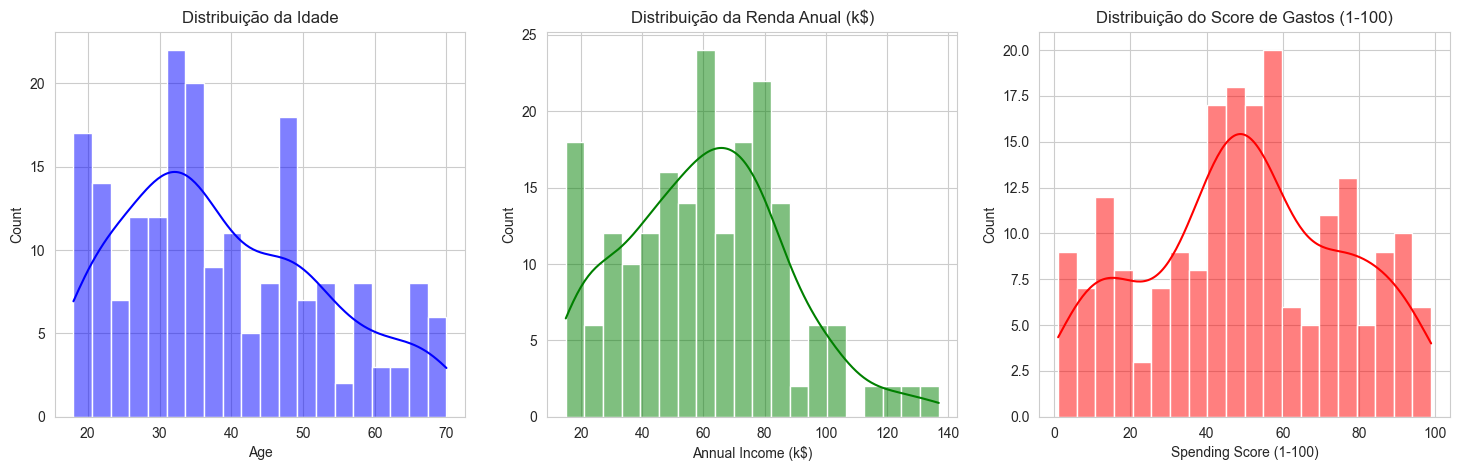

In [3]:
# Distribuição da Idade, Renda Anual e Score de Gastos
plt.figure(1, figsize=(18, 5))

# Gráfico da Idade
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição da Idade')

# Gráfico da Renda Anual
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='green')
plt.title('Distribuição da Renda Anual (k$)')

# Gráfico do Score de Gastos
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Distribuição do Score de Gastos (1-100)')

plt.show()

**Análise dos Gráficos de Distribuição:**
*   **Idade:** A maior concentração de clientes está entre 20 e 40 anos.
*   **Renda Anual:** A maioria dos clientes tem uma renda entre 40k e 80k dólares.
*   **Score de Gastos:** A pontuação de gastos é mais concentrada no meio, entre 40 e 60.

Agora, vamos focar no que mais nos interessa: a relação entre **renda** e **score de gastos**. Um gráfico de dispersão (scatter plot) é perfeito para isso.

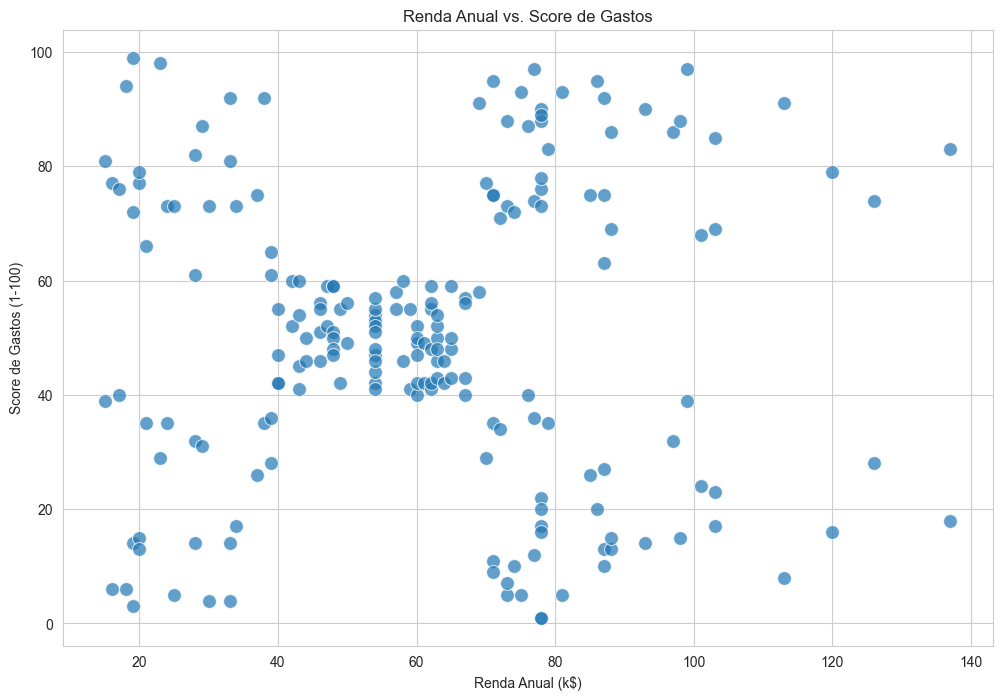

In [4]:
# Gráfico de Dispersão: Renda Anual vs. Score de Gastos
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)
plt.title('Renda Anual vs. Score de Gastos')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.show()

**Observação Importante:**
Olhando para o gráfico acima, você consegue ver "grupos" ou "aglomerados" de pontos? Parece que existem cerca de 5 grupos distintos de clientes. É exatamente isso que o algoritmo K-Means vai tentar formalizar para nós!

### **Passo 4: Preparando os Dados e Encontrando o Número Ideal de Clusters**

O K-Means precisa saber quantos clusters (o "K" do nome) ele deve criar. Podemos usar uma técnica chamada **Método do Cotovelo (Elbow Method)** para nos ajudar a decidir.

A ideia é rodar o K-Means para vários valores de K (de 1 a 10, por exemplo) e medir a "inércia" de cada um. A inércia é a soma das distâncias quadradas de cada ponto ao centro do seu cluster. Queremos uma inércia baixa.

O "cotovelo" no gráfico é o ponto onde a inércia para de diminuir drasticamente. Esse é um bom indicativo do número ideal de clusters.

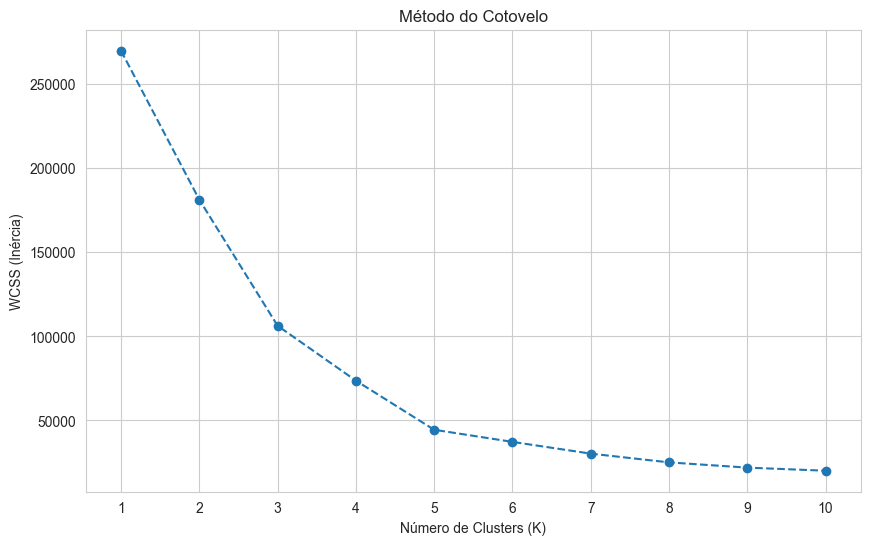

In [5]:
# Vamos focar nas duas variáveis que visualizamos: Renda e Score.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Lista para armazenar a inércia (WCSS - Within-Cluster Sum of Squares)
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(range(1, 11))
plt.show()

**Análise do Gráfico do Cotovelo:**
O "cotovelo" da curva é claramente no ponto **K=5**. A partir daí, a redução na inércia se torna muito menor. Portanto, 5 é o número ideal de clusters para nossos dados. Nossa intuição visual estava certa!

### **Passo 5: Aplicando o K-Means e Visualizando os Segmentos**

Agora que sabemos o número mágico (K=5), vamos aplicar o algoritmo e ver os resultados.

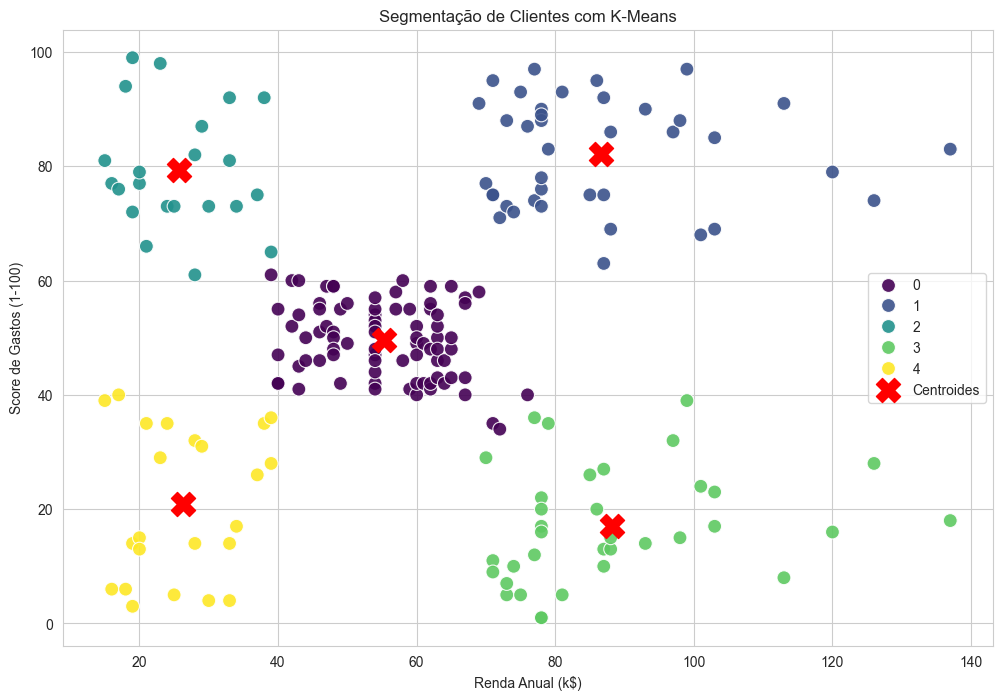

In [6]:
# Criando e treinando o modelo K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Adicionando a coluna de 'Cluster' ao nosso DataFrame original
df['Cluster'] = y_kmeans

# Visualizando os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.9)

# Plotando os centroides (o "coração" de cada cluster)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

plt.title('Segmentação de Clientes com K-Means')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend()
plt.show()

**Sucesso!** O algoritmo K-Means separou nossos clientes em 5 grupos distintos e visualmente coerentes. Agora vem a parte mais importante: entender o que cada grupo significa.

---

## **SUA VEZ**

Agora que os clusters foram criados, sua tarefa é se tornar um(a) analista de dados e transformar esses grupos em insights de negócio valiosos.

### **Tarefa 1: Análise e Interpretação dos Clusters**

Para cada um dos 5 clusters, você deve descrever o perfil dos clientes que pertencem a ele. Uma ótima maneira de começar é calculando a média das características para cada grupo.

**Dica:** Use o método `.groupby()` do pandas.

**Responda às seguintes perguntas (no seu relatório ou em uma célula de texto abaixo):**

1.  **Crie um "apelido" ou "persona" para cada cluster.** Por exemplo: "Econômicos", "Gastadores", "Público Alvo", "Pão-duro", etc. Justifique sua escolha com base nos dados.
2.  **Descreva em detalhes o perfil de cada cluster.**
    *   **Cluster 0:** Qual é a principal característica deste grupo? (Ex: Renda alta, Score baixo)
    *   **Cluster 1:** ...
    *   **Cluster 2:** ...
    *   **Cluster 3:** ...
    *   **Cluster 4:** ...
3.  **Qual cluster você considera o mais valioso para o shopping? E o menos valioso?** Por quê?

,Age,Annual Income (k$),Spending Score (1-100),Contagem,Percentual (%)
Cluster,,,,,
0,42.72,55.30,49.52,81,40.5
1,32.69,86.54,82.13,39,19.5
2,25.27,25.73,79.36,22,11.0
3,41.11,88.20,17.11,35,17.5
4,45.22,26.30,20.91,23,11.5


C:\Users\Rafael\AppData\Local\Temp\ipykernel_23268\2109284007.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='viridis')
C:\Users\Rafael\AppData\Local\Temp\ipykernel_23268\2109284007.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')


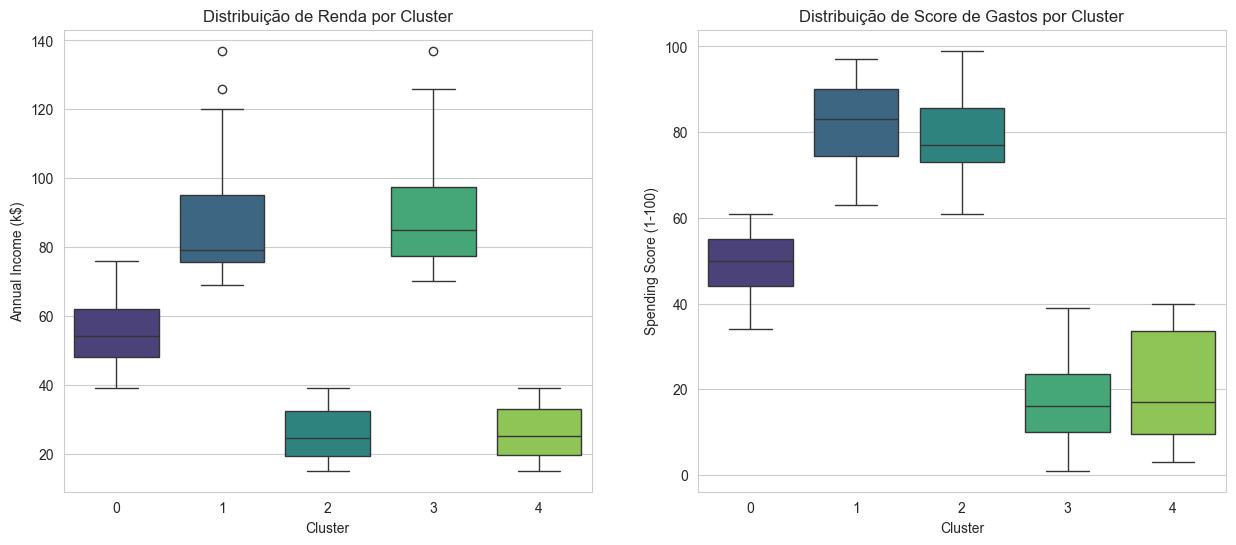

In [9]:
# Calculando a média das variáveis para cada cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Contando quantos clientes temos em cada cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Juntando as informações
summary = cluster_summary.copy()
summary['Contagem'] = cluster_counts
summary['Percentual (%)'] = (summary['Contagem'] / summary['Contagem'].sum()) * 100

# Ordenando para facilitar a leitura
display(summary.round(2))

# Visualização Boxplot para entender a distribuição de Renda e Score por Cluster
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Distribuição de Renda por Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Distribuição de Score de Gastos por Cluster')
plt.show()

Com base nos valores médios de idade, renda anual e spending score de cada grupo, bem como na distribuição percentual dos clientes, foi possível identificar cinco perfis distintos de comportamento de consumo. A análise considera os centroides obtidos no processo de clusterização, permitindo uma caracterização mais precisa de cada segmento.

O cluster 0 é o maior grupo da amostra, representando aproximadamente 40,5% dos clientes. Seus integrantes apresentam idade média de 42,7 anos, renda anual em torno de 55,3 mil dólares e spending score médio de 49,5. Esse perfil pode ser interpretado como o consumidor padrão do shopping, com comportamento relativamente equilibrado: não se trata de um público altamente gastador, mas também não é excessivamente contido. São clientes maduros, com renda intermediária e consumo regular, que sustentam uma parcela relevante do fluxo de vendas.

O cluster 1 reúne cerca de 19,5% dos clientes e se destaca por combinar renda anual elevada, em torno de 86,5 mil dólares, com um spending score muito alto, próximo de 82,1. A idade média desse grupo é mais baixa, aproximadamente 32,7 anos. Esse segmento representa o público mais atrativo do ponto de vista econômico, pois alia alto poder aquisitivo a forte propensão ao consumo. São clientes estratégicos para ações de fidelização, produtos premium e serviços de maior valor agregado.

O cluster 2 corresponde a aproximadamente 11% da base e é composto por clientes mais jovens, com idade média de 25,3 anos. Apesar da renda anual relativamente baixa, em torno de 25,7 mil dólares, esse grupo apresenta um spending score elevado, cerca de 79,4. Esse comportamento indica um padrão de consumo intenso em relação à renda disponível, sugerindo maior impulsividade ou menor sensibilidade a restrições orçamentárias, possivelmente associada ao uso de crédito ou ao suporte financeiro externo.

O cluster 3 representa cerca de 17,5% dos clientes e apresenta um perfil oposto ao do cluster 2. Seus membros possuem idade média de 41,1 anos e renda anual alta, aproximadamente 88,2 mil dólares, porém exibem um spending score bastante baixo, em torno de 17,1. Trata-se de um grupo com elevado potencial financeiro, mas baixa propensão ao consumo no shopping, indicando um comportamento mais conservador ou uma desconexão entre as ofertas disponíveis e as preferências desse público.

Por fim, o cluster 4 engloba aproximadamente 11,5% dos clientes e é formado por consumidores mais velhos, com idade média de 45,2 anos, renda anual baixa, cerca de 26,3 mil dólares, e spending score igualmente reduzido, próximo de 20,9. Esse segmento apresenta um padrão de consumo bastante contido, provavelmente orientado por necessidade ou por limitações financeiras, resultando em baixo impacto direto na receita do shopping.

Do ponto de vista do negócio, o cluster 1 se destaca como o mais valioso, pois concentra clientes com alta renda e alto nível de gasto, gerando maior retorno e margem. Em contraste, o cluster 4 apresenta o menor potencial de conversão no curto prazo. Já o cluster 3 merece atenção especial, pois representa um claro desperdício de potencial: embora possua a maior renda média entre os grupos, seu baixo spending score sugere oportunidades não exploradas, que poderiam ser trabalhadas por meio de estratégias mais alinhadas às preferências desse público.

### **Tarefa 2: Desafio - Incluindo a Idade na Análise**

Nosso modelo usou apenas Renda e Score de Gastos. O que acontece se incluirmos a **Idade** na clusterização?

1.  **Repita o processo de clusterização (Passos 4 e 5)**, mas desta vez usando as colunas `Age`, `Annual Income (k$)` e `Spending Score (1-100)`.
2.  Você pode manter K=5 ou usar o Método do Cotovelo novamente para ver se um número diferente de clusters seria melhor com 3 variáveis.
3.  **Analise os novos clusters.** Eles são parecidos com os que você encontrou na Tarefa 1? A idade parece ser um fator importante para separar os grupos?
4.  **Atenção:** Você não poderá mais usar um gráfico de dispersão 2D para visualizar os clusters, pois agora temos 3 dimensões. A análise terá que ser feita principalmente com base nos valores médios de cada cluster (como no `groupby` da Tarefa 1).

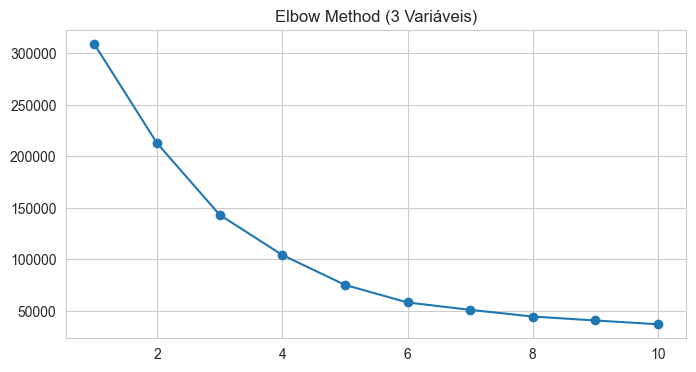

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_3D,,,
0,56.2,53.4,49.1
1,41.7,88.2,17.3
2,25.3,25.7,79.4
3,27.0,56.7,49.1
4,32.7,86.5,82.1
5,44.1,25.1,19.5


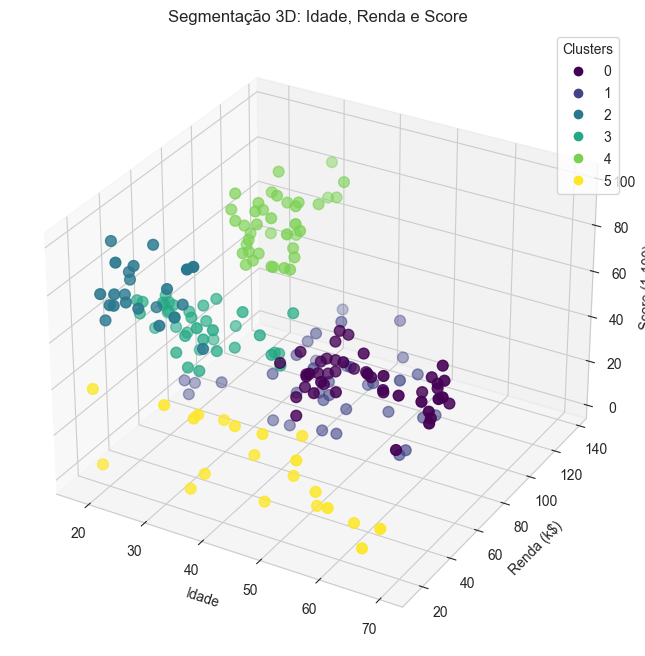

In [11]:
# Selecionando as 3 variáveis
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Recalculando o Cotovelo (Para garantir o K ideal em 3D)
wcss_3d = []
for k in range(1, 11):
    kmeans3 = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans3.fit(X3)
    wcss_3d.append(kmeans3.inertia_)

# Plot rápido do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss_3d, marker='o')
plt.title('Elbow Method (3 Variáveis)')
plt.show()

# Aplicando K-Means 
kmeans3 = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
df['Cluster_3D'] = kmeans3.fit_predict(X3)

# Análise dos Novos Clusters
display(df.groupby('Cluster_3D')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))

# Visualização 3D 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster_3D'], s=60, cmap='viridis')

ax.set_xlabel('Idade')
ax.set_ylabel('Renda (k$)')
ax.set_zlabel('Score (1-100)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Segmentação 3D: Idade, Renda e Score')
plt.show()

Ao incluir a variável Idade na segmentação, observa-se uma mudança qualitativa relevante na interpretação dos clusters, ainda que a separação por renda e spending score continue sendo dominante. A visualização tridimensional evidencia que a idade atua como um fator estrutural de refinamento, permitindo distinguir perfis comportamentais que antes apareciam agregados quando apenas renda e score eram considerados.

Nota-se que a variável idade introduz uma clara separação geracional, especialmente nos grupos de renda média e renda baixa. Clientes mais jovens, concentrados principalmente na faixa entre 20 e 30 anos, apresentam scores de gasto elevados mesmo quando possuem renda limitada. Isso sugere um comportamento de consumo mais "impulsivo" ou orientado à experiência, típico de faixas etárias mais jovens. Em contraste, indivíduos mais velhos, mesmo quando situados em faixas de renda semelhantes, tendem a apresentar scores de gasto significativamente menores, indicando maior cautela financeira e consumo mais racional.

O cluster caracterizado por alta renda e alto spending score mantém-se visualmente coeso no espaço 3D, concentrando-se predominantemente entre 30 e 40 anos. Essa faixa etária corresponde ao período de maior estabilidade profissional e capacidade financeira, o que explica a combinação de elevado poder aquisitivo com alta propensão ao consumo. A presença da idade, portanto, reforça a consistência econômica desse segmento e valida sua interpretação como público estratégico para produtos e serviços de maior valor agregado.

Além disso, a visualização evidencia que clusters com baixo spending score não são homogêneos do ponto de vista etário. Há uma separação nítida entre consumidores mais jovens e mais velhos dentro desses grupos, o que indica que o baixo consumo pode ter motivações distintas: nos jovens, pode estar associado a restrições temporárias de renda ou estágio inicial da vida econômica; nos mais velhos, tende a refletir escolhas conscientes de consumo e maior aversão a gastos supérfluos.

Dessa forma, do ponto de vista estratégico, consumidores com perfis financeiros semelhantes demandam abordagens completamente distintas conforme sua faixa etária. A comunicação, o mix de produtos e as ações promocionais devem ser ajustados para refletir essas diferenças, uma vez que a variável idade altera significativamente a forma como renda e propensão ao gasto se traduzem em comportamento de consumo efetivo.

### **Tarefa 3: Conclusões e Recomendações de Negócio**

Com base na sua análise da **Tarefa 1**, escreva um parágrafo final com recomendações para a equipe de marketing do shopping.

*   Que tipo de campanha de marketing você criaria para o cluster dos "clientes com alta renda e alto score de gastos"?
*   E para o grupo de "baixa renda e alto score de gastos"?
*   Como o shopping poderia tentar engajar o grupo de "alta renda e baixo score de gastos" para que eles gastem mais?

Com base na segmentação realizada, recomenda-se que a equipe de marketing adote estratégias diferenciadas e direcionadas para cada perfil identificado, de modo a maximizar o retorno das ações comerciais. Para o cluster de clientes com alta renda e alto score de gastos, as campanhas devem focar em exclusividade e relacionamento, com ênfase em programas de fidelidade premium, convites para eventos fechados, lançamentos antecipados de produtos e benefícios personalizados. Esse público valoriza status, conveniência e experiências diferenciadas, de modo que ações que reforcem o sentimento de pertencimento e reconhecimento tendem a aumentar a retenção e o ticket médio. Para o grupo de baixa renda e alto score de gastos, a estratégia deve priorizar promoções direcionadas, descontos temporários, ofertas parceladas e campanhas com apelo emocional e experiencial, aproveitando sua alta propensão ao consumo. Nesse caso, ações de curto prazo, como cupons, cashback e eventos promocionais, são mais eficazes para estimular compras recorrentes sem exigir alto poder aquisitivo. Por fim, o grupo de alta renda e baixo score de gastos deve ser trabalhado como uma oportunidade latente de crescimento. Para engajá-los, o shopping pode investir em melhorias na curadoria de lojas, serviços de maior valor agregado, comunicação mais informativa e menos promocional, além de ações que destaquem conveniência, qualidade e diferenciação. O objetivo, nesse caso, é alinhar a oferta do shopping às expectativas desse público, convertendo capacidade financeira em consumo efetivo por meio de experiências que justifiquem o gasto.

---

**Formato de Entrega:**
Entregue este notebook com todas as células executadas e suas respostas para as Tarefas 1, 2 e 3 preenchidas em células de texto (Markdown) e código.

**Boa sorte e boa análise!**